### Exercise on SVM
#### Duarte Balata (46304) Miguel Oliveira (55772) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

Loading the Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

def makePlot(X, y, svc, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)

Below, we will using Sklearn's SVM Kernel's and will be experimenting with Linear, RBF and Polynomial to define the hyperplane. For the time being we will keep C, gamma and degree costant and will discuss these parameters later on. 

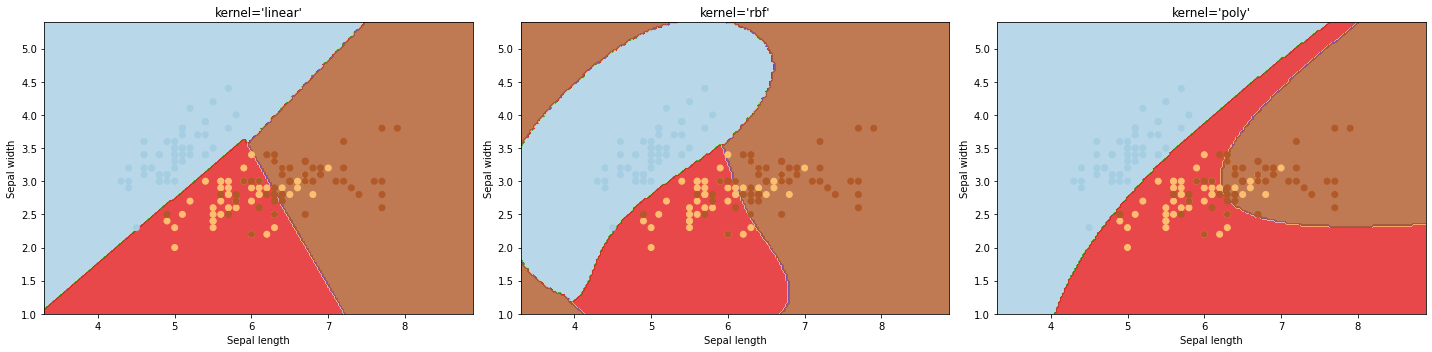

In [3]:
svc1 = svm.SVC(kernel='linear', C=1, gamma=1, degree = 3).fit(X, y)
svc2 = svm.SVC(kernel='rbf', C=1, gamma=1, degree = 3).fit(X, y)
svc3 = svm.SVC(kernel='poly', C=1, gamma=1, degree = 3).fit(X, y)

fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
makePlot(X, y, svc1, title="kernel='linear'")
plt.subplot(1, 3, 2)
makePlot(X, y, svc2, title="kernel='rbf'")
plt.subplot(1, 3, 3)
makePlot(X, y, svc3, title="kernel='poly'")

plt.tight_layout()

When using a basic linear SVM kernel, the hyperplane will be calculated by using the kernel trick and use linear learning to identify the hyperplane that has the biggest distance between the seperating point and the nearest point of the training set. 

The RBF SVM kernel is usually the standard kernel used by Sklearn and is non-linear. With this type, the dimensions are increased exponentially. As the data is now mapped on a infinite dimensional space, we are able to define the hyperplanes in that space.

The Polynomial kernel also creates a non-linear hyperplane. In this case as degree = 3 the polynomial kernel will be using observations from the data in 3-Dimensions and the creating the hyperplane in that 3D space. 

Below, we will be experimenting with the gamma parameters on kernel "RBF".

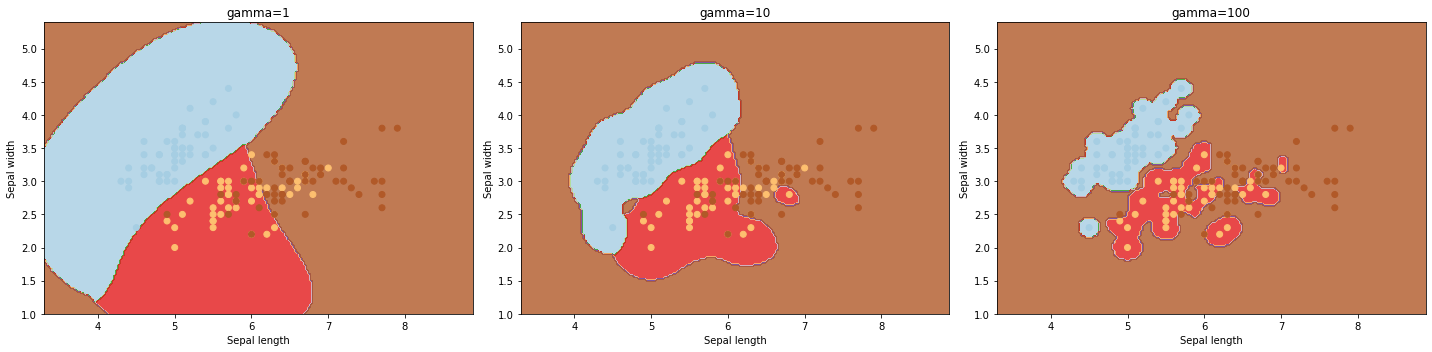

In [4]:
svc1 = svm.SVC(kernel='rbf', C=1, gamma=1, degree = 1).fit(X, y)
svc2 = svm.SVC(kernel='rbf', C=1, gamma=10, degree = 5).fit(X, y)
svc3 = svm.SVC(kernel='rbf', C=1, gamma=100, degree = 10).fit(X, y)

fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
makePlot(X, y, svc1, title="gamma=1")
plt.subplot(1, 3, 2)
makePlot(X, y, svc2, title="gamma=10")
plt.subplot(1, 3, 3)
makePlot(X, y, svc3, title="gamma=100")

plt.tight_layout()

The gamma parameter defines how far the influence of a single training example reaches. Its increase results in more strict classification, that can often be associated with an overfitting problem, as the training set will have a higher influence on the classification. 

Below, we will experiment with the concept of increasing dimensions of the poly Kernel by increasing degrees and seeing its effect on the support vector classification.

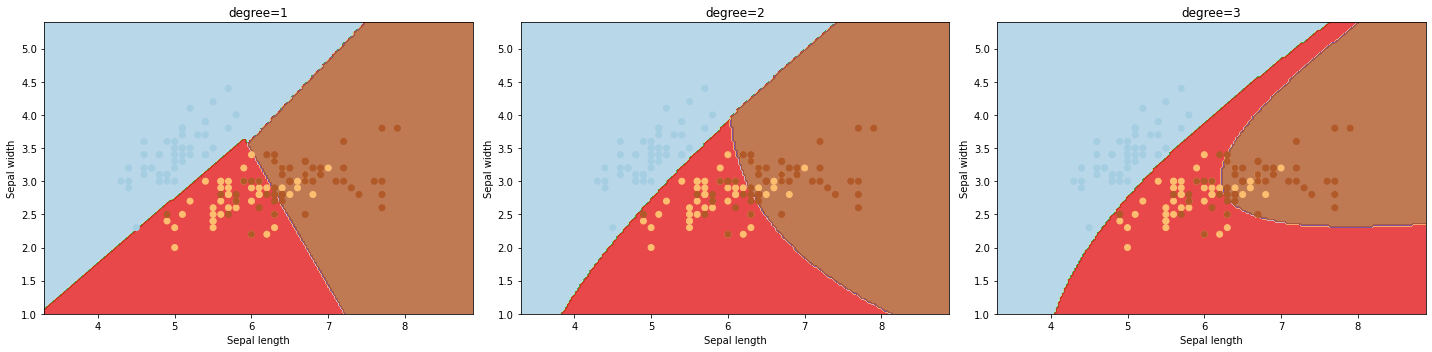

In [5]:
svc1 = svm.SVC(kernel='poly', C=1, gamma=1, degree = 1).fit(X, y)
svc2 = svm.SVC(kernel='poly', C=1, gamma=1, degree = 2).fit(X, y)
svc3 = svm.SVC(kernel='poly', C=1, gamma=1, degree = 3).fit(X, y)

fig = plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
makePlot(X, y, svc1, title="degree=1")
plt.subplot(1, 3, 2)
makePlot(X, y, svc2, title="degree=2")
plt.subplot(1, 3, 3)
makePlot(X, y, svc3, title="degree=3")

plt.tight_layout()

We can see above that the hyperplanes in a 1-D space are linear , and as we increase the degree and therefore the dimensional space, the hyperplane becomes less linear. 

For the second problem, we start by defining the original xy coordinates of the test dataset by overlaying the given figure with a labeled referential an marking the point positions.

We plot the defined points in a 2D space, assigning them the colors corresponding to groups in original the problem.

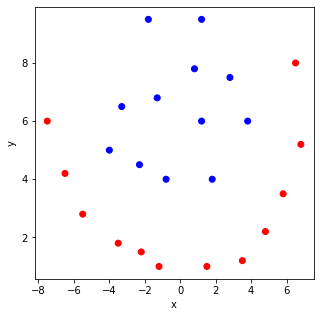

In [15]:
blue_red = pd.DataFrame({'x': [-4, -3.3, -2.3, -1.8, -1.3, -0.8, 0.8, 1.2, 1.2, 1.8, 2.8, 3.8, -7.5, -6.5, -5.5, -3.5, -2.2, -1.2, 1.5, 3.5, 4.8, 5.8, 6.5, 6.8], 
                        'y': [5, 6.5, 4.5, 9.5, 6.8, 4, 7.8, 9.5, 6, 4, 7.5, 6, 6, 4.2, 2.8, 1.8, 1.5, 1, 1, 1.2, 2.2, 3.5, 8, 5.2],
                        'target': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})


colors = np.where(blue_red['target'] == 1, "red", "blue")
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(blue_red.x, blue_red.y, c=colors)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.draw()

Posteriorly, we have to define an additional feature (z), in order to be possible to have an hyperplane that successfully separates the two classes of data.

By looking at the configuration of the points in the dataset, we propose that any feature that results in a projection of a parabola into the 3D space, such as z=x², or an elliptic paraboloid, such as z=x²+y² should be able to separate the data points.

As such, we test this proposition by plotting the dataset with z=x²+y² as its third axis. 

By looking at the plotted 3D representantion, it becomes clear that the points are separable. We then project the points from the tri-dimensional coordinate space into a 2D referential by plotting the y coordinates into x axis and the z coordinates into y axis.

Finally, we plot a visual approximation of the separation hyper-plane between the classes of data in order to clearly display that the dataset is linearly separable.

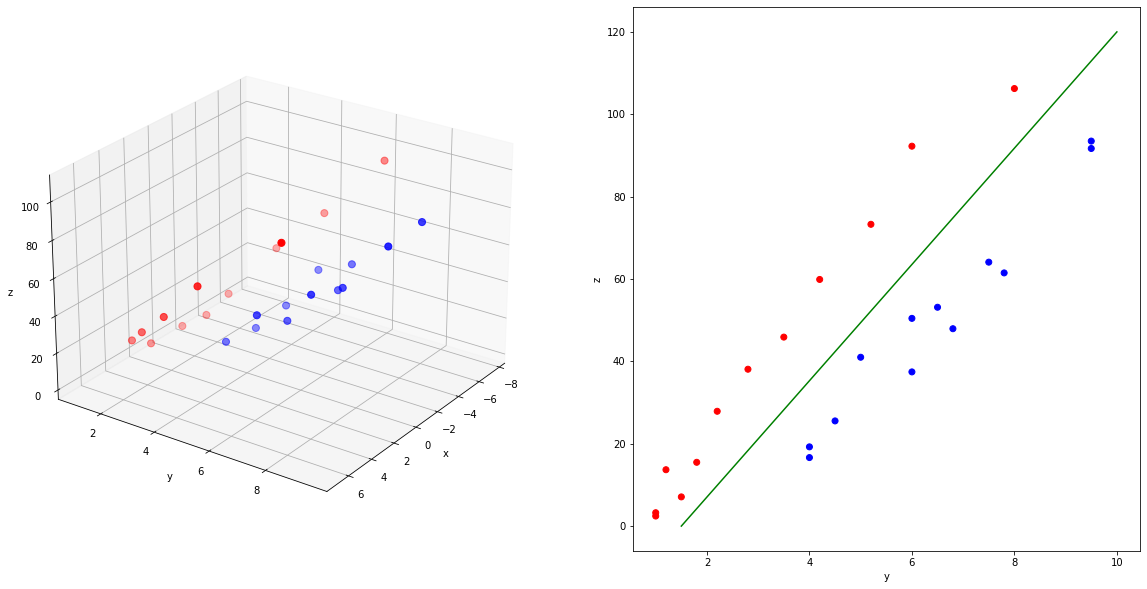

In [16]:
blue_red['z'] = blue_red.apply(lambda col: col.x**2 + col.y**2, axis=1)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(blue_red.x, blue_red.y, blue_red.z, c=colors, s=50)
ax.view_init(25, 35)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax = fig.add_subplot(122)
ax.scatter(blue_red.y, blue_red.z, c=colors)
ax.set_xlabel("y")
ax.set_ylabel("z")
ax.plot([1.5, 10], [0, 120], 'k-', color = 'g')
plt.draw()